In [45]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

Floyd-Steinberg

In [54]:
def floyd_steinberg_dithering(image):
    
    # Convert the image to grayscale
    grayscale_image = image.convert('L')
    pixels = np.array(grayscale_image)
    height, width = pixels.shape
    
    # Create an output image array
    dithered_image = np.zeros((height, width), dtype=np.uint8)

    for y in range(height):
        for x in range(width):
            old_pixel = pixels[y, x]
            new_pixel = 255 * (old_pixel > 127)  # Thresholding: 255 for white, 0 for black
            dithered_image[y, x] = new_pixel
            quant_error = old_pixel - new_pixel
            
            # Distribute the error to the neighboring pixels
            if x + 1 < width:
                pixels[y, x + 1] += quant_error * 7 / 16
            if y + 1 < height:
                if x > 0:
                    pixels[y + 1, x - 1] += quant_error * 3 / 16
                pixels[y + 1, x] += quant_error * 5 / 16
                if x + 1 < width:
                    pixels[y + 1, x + 1] += quant_error * 1 / 16

    return dithered_image


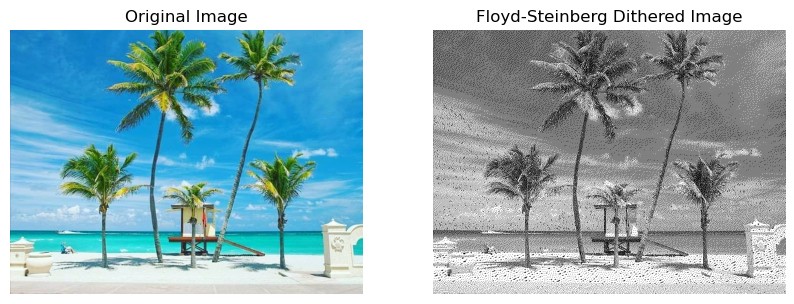

In [55]:
# Load the image
input_image = Image.open('beach.jpg')  

# Apply Floyd-Steinberg dithering
dithered_image = floyd_steinberg_dithering(input_image)

# Display the original and dithered images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(input_image, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Floyd-Steinberg Dithered Image')
plt.imshow(dithered_image, cmap='gray')
plt.axis('off')

plt.show()

Jarvis-Judice-Ninke

In [56]:
def jarvis_judice_ninke_dithering(image):
    # Convert the image to grayscale
    grayscale_image = image.convert('L')
    pixels = np.array(grayscale_image)
    
    height, width = pixels.shape
    
    # Create an output image array
    dithered_image = np.zeros((height, width), dtype=np.uint8)

    for y in range(height):
        for x in range(width):
            old_pixel = pixels[y, x]
            new_pixel = 255 * (old_pixel > 127)  # Thresholding: 255 for white, 0 for black
            dithered_image[y, x] = new_pixel
            quant_error = old_pixel - new_pixel
            
            # Distribute the error to the neighboring pixels
            if x + 1 < width:
                pixels[y, x + 1] += quant_error * 7 / 48
            if x + 2 < width:
                pixels[y, x + 2] += quant_error * 5 / 48
            if y + 1 < height:
                if x > 0:
                    pixels[y + 1, x - 1] += quant_error * 3 / 48
                pixels[y + 1, x] += quant_error * 5 / 48
                if x + 1 < width:
                    pixels[y + 1, x + 1] += quant_error * 3 / 48
            if y + 2 < height:
                if x > 1:
                    pixels[y + 2, x - 2] += quant_error * 1 / 48
                if x > 0:
                    pixels[y + 2, x - 1] += quant_error * 3 / 48
                pixels[y + 2, x] += quant_error * 5 / 48
                if x + 1 < width:
                    pixels[y + 2, x + 1] += quant_error * 3 / 48
                if x + 2 < width:
                    pixels[y + 2, x + 2] += quant_error * 1 / 48

    return dithered_image



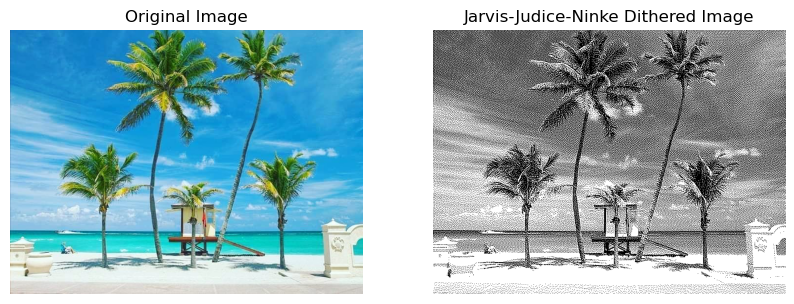

In [59]:
# Load the image
input_image = Image.open('beach.jpg')  

#Jarvis-Judice-Ninke dithering
dithered_image = jarvis_judice_ninke_dithering(input_image)

# Display the original and dithered images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(input_image, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Jarvis-Judice-Ninke Dithered Image')
plt.imshow(dithered_image, cmap='gray')
plt.axis('off')

plt.show()

In [ ]:
Floyd - Steinberg dithering produces a slightly grainy texture due to the limited number of pixels affected by quantization error.
It is faster to computer because relatively fewer neighboing pixels are involved in error calculations.
Jarvis-Judice-Ninke dithering produces smoother transitions between tones and less graininess. 
Edges are relatively smoother, but computationally expensive because this algorithm involves more neighboring pixels.
It can preserve more details compared to Floyd-Steinberg dithering